<a href="https://www.kaggle.com/code/gabrielazx/explora-o-e-an-lise-dados-de-cr-dito?scriptVersionId=112152745" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

#EXPLORAÇÃO E ANÁLISE DE DADOS DE CRÉDITOS COM SQL**


# Dados utilizados:

Os dados apresentados são de clientes de um banco e apresentam as seguintes tabelas:

* idade = idade do cliente
* sexo = sexo do cliente (F ou M)
* dependentes = número de dependentes do cliente
* escolaridade = nível de escolaridade do clientes
* salario_anual = faixa salarial do cliente
* tipo_cartao = tipo de cartao do cliente
* qtd_produtos = quantidade de produtos comprados nos últimos 12 meses
* iteracoes_12m = quantidade de iterações/transacoes nos ultimos 12 meses
* meses_inativo_12m = quantidade de meses que o cliente ficou inativo
* limite_credito = limite de credito do cliente
* valor_transacoes_12m = valor das transações dos ultimos 12 meses
* qtd_transacoes_12m = quantidade de transacoes dos ultimos 12 meses

>A tabela foi criada no AWS Athena junto com o S3 Bucket com uma versão dos dados disponibilizados em: https://github.com/andre-marcos-perez/ebac-course-utils/tree/main/dataset

# Exploração de dados 

A primeira fase é importante conhecer com o que estamos trabalhando. Vamos explorar os dados.

**Para começar, iremos descobrir qual é a quantidade de informações que estamos explorando base de dados:**

> Query: SELECT COUNT (*) as linhas FROM credito

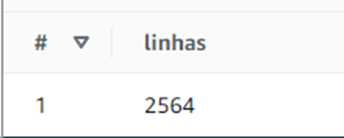

> É possível analisar que a resposta foi 2564 linhas, porém na base de dados que pode ser encontrada no link indicado, são econtrados mais linhas do que na resposta, já que não foram usadas todas, em razão de limites financeiros e computacionais.


**Como são os dados?**
> Query: SELECT * FROM credito LIMIT 7;

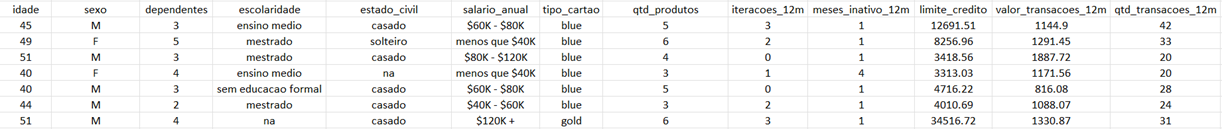
> Podemos observar que alguns dados ficaram nulos(na), vamos nos aprofundar.

**Quais são os tipos de cada dados?**
> Query: Describe credito;

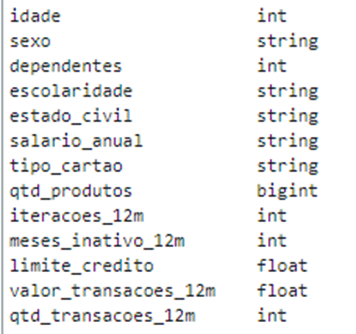
> Uma forma mais detalhada de visualizar quais são os tipos de dados que vamos analisar.

**Quais são os tipos de escolaridade disponíveis no dataset?**
> Query: SELECT DISTINCT escolaridade FROM credito

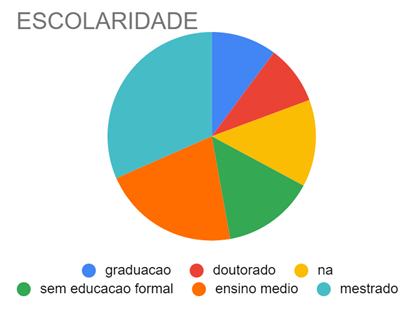

> Com a visualização do gráfico pizza criado no google sheets, podemos observar que existe nulo(na) nos valores de escolaridade.

**Quais são os tipos de salario_anual disponíveis no dataset?**
> Query: SELECT DISTINCT salario_anual FROM credito

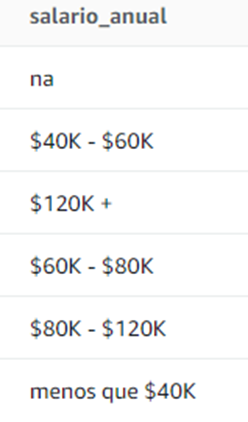

> No resultado da query é possível identificar valores nulos 

**Quais são os tipos cartões utilizados?**
> Query: SELECT DISTINCT tipo_cartao FROM credito

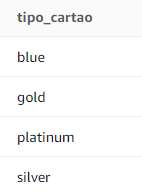
> O resultado mostra os tipos de cartões que podem ser encontrados no banco.

**Quais são os tipos de estado_civil disponíveis no dataset?**
> Query: SELECT DISTINCT estado_civil FROM credito

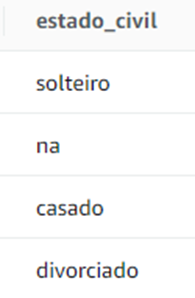

> Nos valores encontrados no estado civil dos clientes, é possível visualizar um valor nulo(na).





# Análise de dados
Já que passamos pela fase de explorar os dados e buscar com quais informações estamos lidando, agora podemos analisar e fazer relações para no final ter bons insight.


**No Banco de Dados, qual é a quantidade de clientes por sexo?**


> Query: select count (sexo) as quantidade_por_sexo, sexo
from credito
group by sexo;

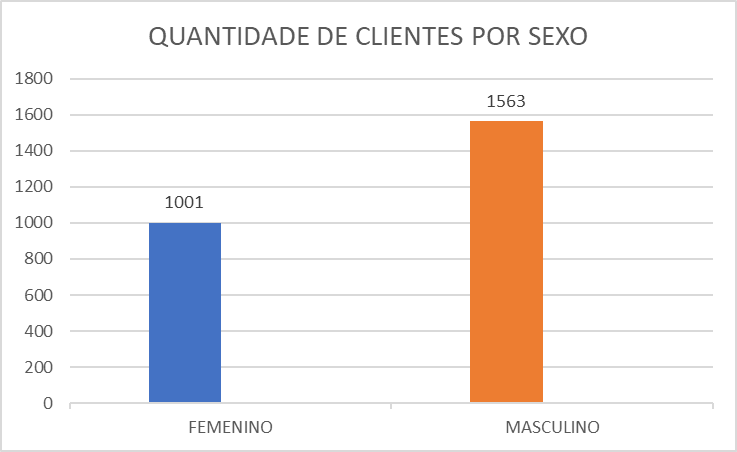
> Podemos ver que o gráfico feito no excel pelo resultado da query mostrou uma predominância do sexo masculino no dataset. 

**Precisamos saber qual é faixa étaria dos clientes do banco, qual é a média da idade por sexo?**
> select sexo, avg(idade) as media_idade
from credito
group by sexo;

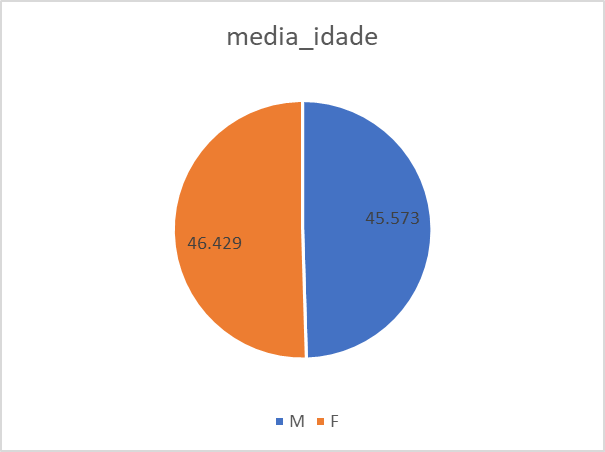
> Com o gráfico pizza criado no Excel, conseguimos analisar que não existe uma discrepância em relação a média da idade dos clientes, ficando entre 45 - 46 anos.

**Qual é a quantidade de clientes por escolaridade no dataset?** 
> Query:select count (escolaridade), escolaridade
from credito
where escolaridade !='na'
group by escolaridade;

!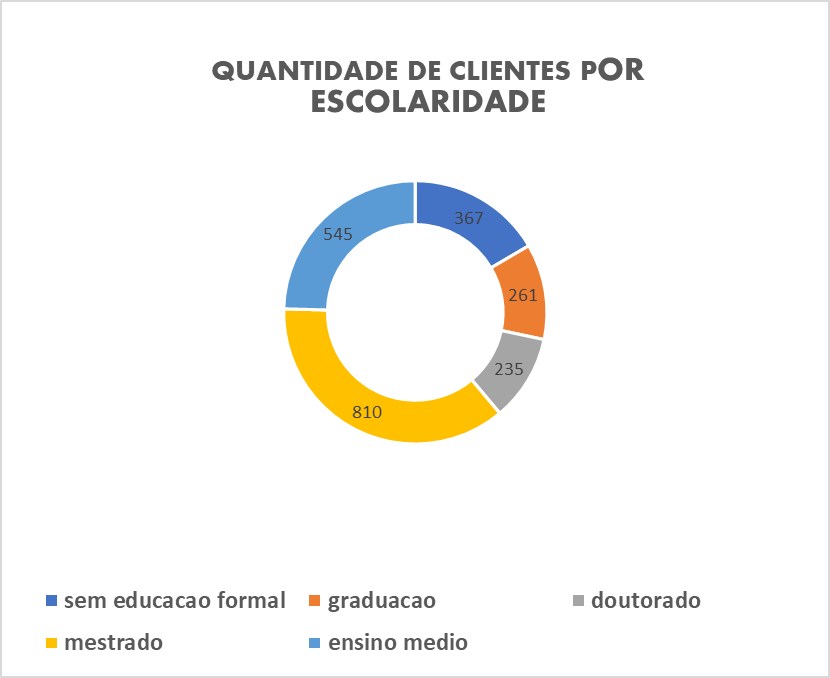
> Com esse resultado é possível observar que a maior quantidade de clientes por escolaridade é o do mestrado com 810 pessoas. Além disso, podemos fazer a relação com a escolaridade e o sexo do cliente.

**Agora queremos descobrir a relação da escolaridade e o sexo do cliente:**
> Query: select count (escolaridade) as quantidade, escolaridade, sexo
from credito
where escolaridade !='na'
group by escolaridade, sexo;



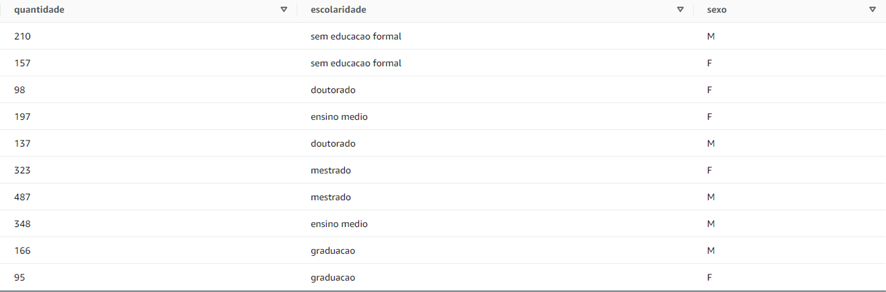
> Podemos analisar que, com o resultado da query anterior, dos 810 em mestrado, 487 são do sexo masculino e 323 femenino, sendo o sexo femenino minoria em todos os tipos de escolaridade.


**Queremos descobrir quanto cada sexo recebe no salario_anual, qual é o salario anual por sexo encontrado no Banco de Dados?**
>select sexo, salario_anual, count (sexo) as quantidade
from credito
where escolaridade !='na' and salario_anual !='na'
group by salario_anual, sexo;


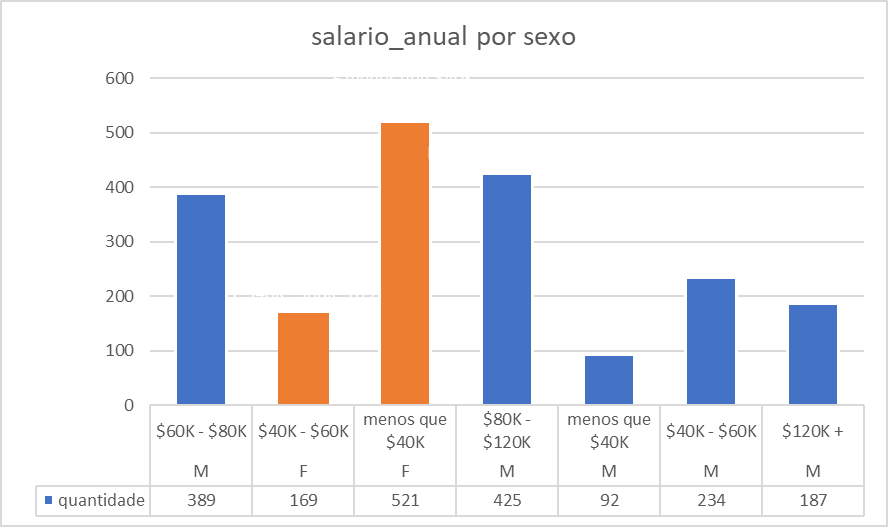
>o retorno da query mostra que o sexo feminino recebe o menor salario anual,fica como observsação o motivo disso, será que é um fator cultural, onde as mulheres recebem menos que os homens, além disso, o fato de receberem um salario anual menor, possui influência no valor de transações nos últimos 12meses?. Ademais, vale ressaltar que a maior quantidade de clientes por faixa salarial encontrada foram os que recebem menos de $40k, será que a empresa deveria dá uma atenção a mais nesse público já que são a maioria?


**Será que o valor do salário impacta no tipo de cartão?**
>select count (tipo_cartao), salario_anual, tipo_cartao
from credito
where salario_anual !='na'
group by tipo_cartao, salario_anual;

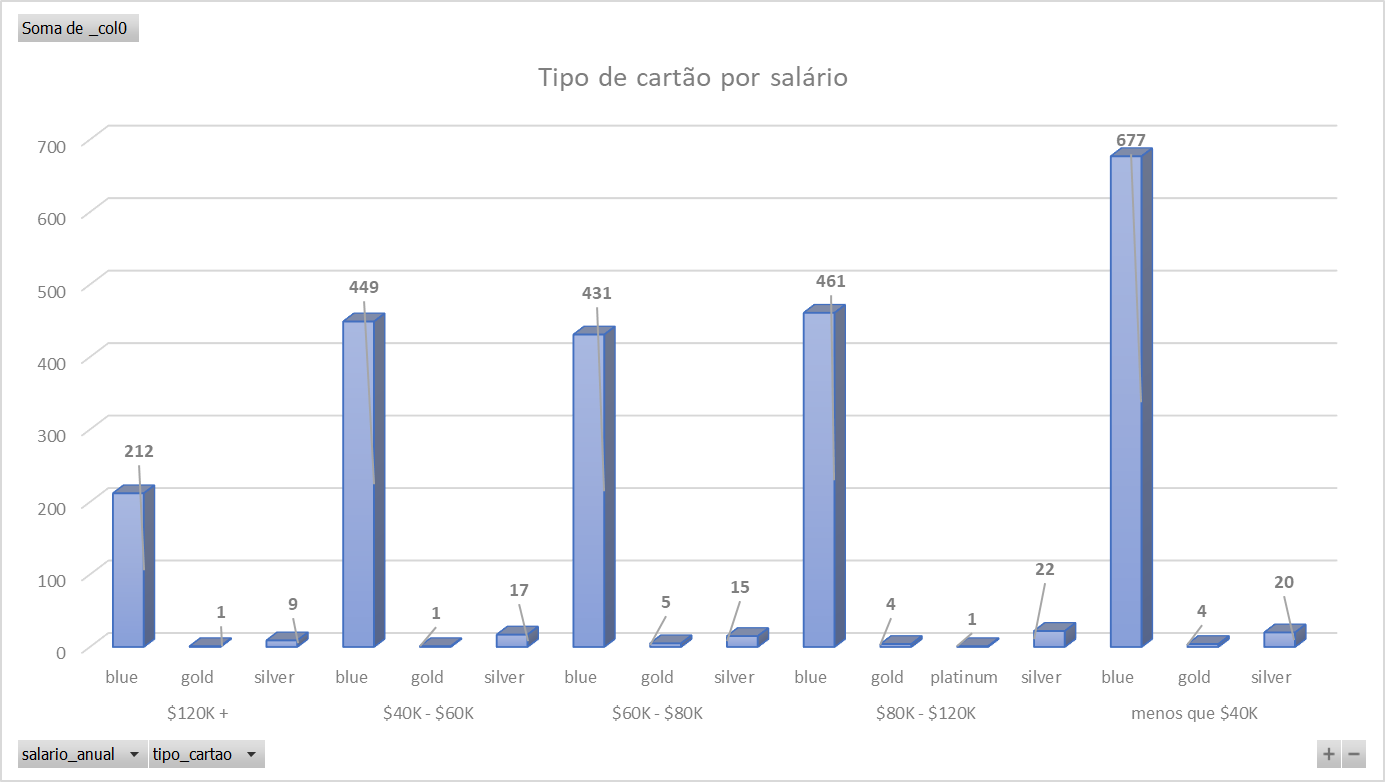
> Podemos concluir que o cartão tipo blue está em grande quantidade em todas categorias salariais, e o platinum apenas na faixa salarial entre $80K-$120K, não sendo presente nas menores faixas salarais.

**Quais são os valores de transacoes nos ultimos 12 meses por sexo?**
> select sexo, min (valor_transacoes_12m) as valor_minimo, max (valor_transacoes_12m) as valor_maximo
from credito
group by sexo;


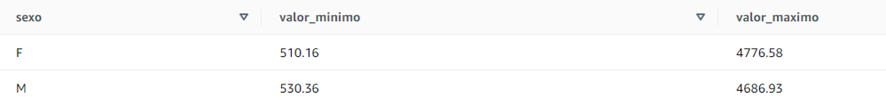
> Os valores de transacoes feitas nos ultimos 12 meses por cada sexo, não apresenta muito uma relação, já que, mesmo o sexo femenino(F) recebendo um salario anual consideravelmente menor, o maior valor_maximo foi do sexo F, e não possui uma diferença elevada entre os dois(F e M). Podemos analisar qual é a média que disponibilizaram de crédito.


**O salario anual influência no limite do crédito?**
> Query: select sexo, salario_anual, avg (limite_credito) as media_limite
from credito
where salario_anual !='na'
group by sexo, salario_anual, sexo;

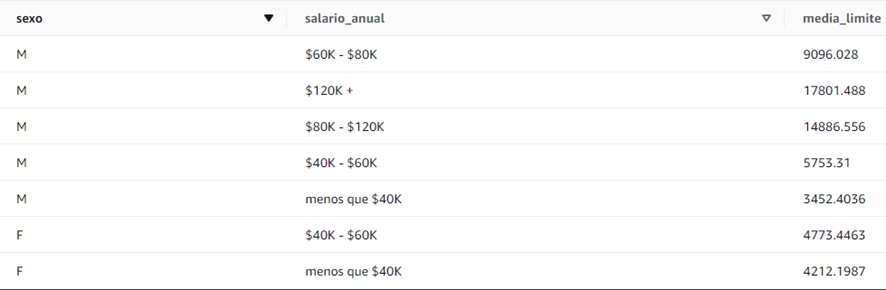
>  Sim, os menores salarios anuais (menos que $40K e 40K-60K) são os que apresentam a menor média de limite para ambos sexos.



# **Conclusão**

Essas foram algumas análises extraídas do dataset de crédito.

Alguns insights interessantes:

* Mesmo o sexo feminino recendo um salário anual inferior ao masculino, não existe uma diferença considerável entre os valores de transações nos últimos 12 meses.

* Clientes que recebem salário menor que $40k e  $40K-60K para ambos sexos, tendem a ter um limite menor disponível 

* A maioria dos clientes são masculino.

* Na categoria de escolaridade, mestrado é maioria entre os clientes, sendo ensino médio o segundo maior público.

* Clientes femininos são minorias em todos os tipos de escolaridade.

*  O cartão blue é o mais usado pelos clientes.

* O cartão Platinum só apareceu na faixa salarial de 80K-120K

> Fica uma observação, por ser maior o púbilico com menor salario, será que a empresa deveria focar em aumentar os beneficios para esses, visando aumentar os clientes. Além disso, ampliar o público de cartões gold, silver e platinum, já que existe um público considerável para se adequar aos tipos de cartões sugeridos, sendo possível os clientes aproveitarem de maiores benefícios de acordo com seu salário.

